In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

artists_data_path = "../data/artists.jsonl"
sessions_data_path = "../data/sessions.jsonl"
track_storage_data_path = "../data/track_storage.jsonl"
tracks_data_path = "../data/tracks.jsonl"
users_data_path = "../data/users.jsonl"

artists_data_frame = pd.read_json(artists_data_path, lines=True)
sessions_data_frame = pd.read_json(sessions_data_path, lines=True)
tracks_data_frame = pd.read_json(tracks_data_path, lines=True)
users_data_frame = pd.read_json(users_data_path, lines=True)

Pominęliśmy analizę danych o przechowywaniu utworów, ponieważ nie wnoszą one żadnych informacji do analizy w naszym temacie projektu.

# Analiza artystów

In [4]:
artists_data_frame.head(n=5)

,id,name,genres
0,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"[desi pop, hindi indie, indian indie, indian rock, new delhi indie, sufi]"
1,5wJ1H6ud777odtZl5gG507,Vishal Mishra,"[desi pop, modern bollywood]"
2,6AETRCQep85mUtIlX7BaFV,Color Humano,"[argentine rock, rock nacional]"
3,3PN8odvj48fnALdAsCKG3g,Crucis,"[italian progressive rock, rock nacional]"
4,5SAeZRhgmJhgq196BR1Mna,Dúo Salteño,"[folclore salteno, folklore argentino]"


Atrybuty:
* id - identyfikator artysty
* name - nazwa artysty
* genres - gatunki muzyczne, które tworzy

In [5]:
artists_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10657 entries, 0 to 10656
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10657 non-null  object
 1   name    10657 non-null  object
 2   genres  10657 non-null  object
dtypes: object(3)
memory usage: 249.9+ KB


### Analiza id

In [6]:
print("unique ids: {}/{}".format(artists_data_frame['id'].nunique(), artists_data_frame['id'].count()))

unique ids: 10657/10657


Wszystkie ID są unikatowe

### Analiza name


In [7]:
print("unique names: {}/{}".format(artists_data_frame['name'].nunique(), artists_data_frame['name'].count()))

# find artists with duplicated names
artists_data_frame[artists_data_frame['name'].duplicated(keep=False)]

unique names: 10643/10657


,id,name,genres
358,2xgbz6gqoIF4S6JZoRiH2y,Dalton,[classic danish pop]
390,38YroIcEOM2zsIEGdtmZYm,Bamse,"[barnmusik, bornesange]"
460,0Yk0PoyjQiEyIKgnaJFR0n,Traffic,"[estonian pop, estonian rock]"
1093,3rUSk3kcpl4Nseu1DqFNpJ,KK,"[classic icelandic pop, icelandic pop]"
1384,3lPK4zqijDKAvZkdlmZRfN,Mango,[lithuanian pop]
2076,4ppDL5W65K1HG6EF7yaDLd,Little River Band,"[album rock, classic rock, country rock, folk rock, mellow gold, soft rock]"
2352,53Thxvlr6imD5y3lxouOu4,Phoenix,[romanian rock]
2546,363VbwpX9anvrThJ2qDwBy,TNT,"[glam metal, hard rock]"
2721,1CqOLQmjzVWXQTiIN5Wucs,TNT,"[euphoric hardstyle, hardstyle]"
2757,7c5278WShlxTk3vS9XoTf8,Wings,[rock kapak]


Istnieje 28 artystów, których nazwa jest zduplikowana. Nie wpływa to jednak na analizę, ponieważ będziemy łączyć dane na podstawie ID artystów.

### Analiza genres

In [30]:
# how many artists are in each genre
# (genres are stored as a lists of strings for each artist, so first unroll the list)
print("amount of genres: {}".format(artists_data_frame['genres'].explode().nunique()))
artists_data_frame['genres'].explode().value_counts()

amount of genres: 2875


genres
rock                                       366
mellow gold                                258
soft rock                                  256
adult standards                            253
classic rock                               244
folk rock                                  230
album rock                                 223
country rock                               206
latin                                      204
art rock                                   185
dance pop                                  180
pop rock                                   175
hard rock                                  172
new wave pop                               171
soul                                       170
pop                                        166
rock en espanol                            162
j-pop                                      159
brill building pop                         152
tropical                                   150
c-pop                                      148
europo

Gatunków jest prawie 3 tysiące - może należy je jakoś pogrupować, żeby podobne gatunki były traktowane tak samo?

# Analiza sesji

In [9]:
sessions_data_frame.head(n=5)

,timestamp,user_id,track_id,event_type,session_id
0,2023-01-03 05:09:55.000,101,2PmGtDUyJIpYBEtI1hQIVp,PLAY,124
1,2023-01-03 05:14:02.707,101,7hXy7Oc0XfODlcR8ESR9up,PLAY,124
2,2023-01-03 05:15:59.184,101,7hXy7Oc0XfODlcR8ESR9up,SKIP,124
3,2023-01-03 05:15:59.184,101,5atzraDZf6C8dEIFBHw3E2,PLAY,124
4,2023-01-03 05:16:47.572,101,5atzraDZf6C8dEIFBHw3E2,SKIP,124


Atrybuty:
* timestamp - czas rozpoczęcia sesji
* user_id - identyfikator użytkownika
* track_id - identyfikator utworu
* event_type - typ zdarzenia (PLAY, LIKE, SKIP)
* session_id - identyfikator sesji


In [10]:
sessions_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19348 entries, 0 to 19347
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   19348 non-null  datetime64[ns]
 1   user_id     19348 non-null  int64         
 2   track_id    19348 non-null  object        
 3   event_type  19348 non-null  object        
 4   session_id  19348 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 755.9+ KB


### Analiza timestamp

In [11]:
sessions_data_frame['timestamp'].describe()

count                            19348
mean     2023-02-13 09:22:11.073808640
min                2023-01-01 06:00:09
25%      2023-01-23 18:21:12.364000256
50%         2023-02-13 20:04:24.712000
75%      2023-03-07 07:58:05.143000064
max         2023-03-28 15:10:21.062000
Name: timestamp, dtype: object

Sesje rozpoczęły się 2023-01-01 06:00:09 i zakończyły 2023-03-24 15:10:21.062000.


### Analiza user_id

In [12]:
sessions_data_frame['user_id'].value_counts().describe()

count      50.000000
mean      386.960000
std       261.935649
min        44.000000
25%       157.750000
50%       339.000000
75%       588.750000
max      1052.000000
Name: count, dtype: float64

Średnia liczba sesji na użytkownika wynosi 387, a maksymalna 1052.


### Analiza track_id
Na jedną piosenkę przypada mniej więcej 4 wydarzenia z nią związane.

In [22]:
# how many unique tracks do we have
print (f'{sessions_data_frame["track_id"].nunique()} unique tracks in {sessions_data_frame["track_id"].count()} entries')

4961 unique tracks in 19348 entries


### Analiza event_type

In [13]:
sessions_data_frame['event_type'].value_counts()

event_type
PLAY             10229
SKIP              3761
LIKE              2833
ADVERTISEMENT     2497
BUY_PREMIUM         28
Name: count, dtype: int64

### Analiza session_id

In [31]:
sessions_data_frame['session_id'].value_counts().describe()

unique session ids: 596


count    596.000000
mean      32.463087
std       23.582724
min        1.000000
25%       11.000000
50%       29.000000
75%       50.000000
max       98.000000
Name: count, dtype: float64

Średnia liczba zdarzeń na sesję wynosi 32.5


# Analiza danych o utworach


In [15]:
tracks_data_frame.head(n=5)

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4LdczeQKU4ojwFJd6QWGnW,Taking Care Of Business - 2005 Remaster,1,177853,0,4AgFg0hHythyklEs4t7XKt,2011-01-01,0.554,0.847,7,-7.237,0.0633,0.00789,0.000002,0.183,0.733,90.655
1,7F20EOraDwU8KvNcyzUKVz,Leef,42,217903,0,5l2Xy4aUoJDRSpsYHyOumD,2015-06-26,0.673,0.727,9,-6.587,0.0401,0.28200,0.000000,0.178,0.782,121.016
2,5EMGRFIidh98v9eXj6QnOU,Dime Que No,62,266013,0,0h1zs4CTlU9D2QtgPxptUD,2012-01-23,0.535,0.648,0,-5.842,0.0364,0.36900,0.000000,0.075,0.311,142.486
3,5XFfcpc0V1fqHeiEjJd4y5,I Hate the Capitalist System,28,196387,0,7htyUKqAPLpbTA9nkEhGRf,1973-01-01,0.454,0.115,5,-15.617,0.0405,0.79700,0.000000,0.103,0.366,86.761
4,4fsmo5mukKd4vafcHN41KP,Hai la sârbă roată,24,223013,0,4a0FNCbvDEoeHYFfc045W4,2008-01-01,0.509,0.699,10,-4.935,0.0372,0.68600,0.000016,0.267,0.949,174.827


Atrybuty:
* id - identyfikator utworu
* name - nazwa utworu
* popularity - popularność utworu
* duration_ms - długość utworu w milisekundach
* explicit - czy utwór zawiera treści nieodpowiednie dla dzieci
* id_artist - identyfikator artysty
* release_date - data wydania utworu
* danceability - współczynnik "taneczności" utworu
* energy - współczynnik "energii" utworu
* key - główny ton utworu
* loudness - głośność utworu
* speechiness - współczynnik "mowy" utworu
* acousticness - współczynnik "akustyczności" utworu
* instrumentalness - współczynnik "instrumentalności" utworu
* liveness - współczynnik "żywotności" utworu
* valence - współczynnik "pozytywności" utworu
* tempo - tempo utworu

Niestety brakuje tutaj informacji o gatunku konkretnego utworu - zamiast tego możemy tylko wyciągnąć informacje o wszystkich gatunkach, jakie wykonuje dany artysta. Niestety ogranicza to możliwości bliskiego przewidywania działań przy konkretnych utworach, bazując na samym ich gatunku.

In [16]:
tracks_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21608 entries, 0 to 21607
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21608 non-null  object 
 1   name              21608 non-null  object 
 2   popularity        21608 non-null  int64  
 3   duration_ms       21608 non-null  int64  
 4   explicit          21608 non-null  int64  
 5   id_artist         21608 non-null  object 
 6   release_date      21608 non-null  object 
 7   danceability      21608 non-null  float64
 8   energy            21608 non-null  float64
 9   key               21608 non-null  int64  
 10  loudness          21608 non-null  float64
 11  speechiness       21608 non-null  float64
 12  acousticness      21608 non-null  float64
 13  instrumentalness  21608 non-null  float64
 14  liveness          21608 non-null  float64
 15  valence           21608 non-null  float64
 16  tempo             21608 non-null  float6

### Analiza id
Wszystkie ID są unikatowe.

In [32]:
# how many unique IDs do we have
print(f'{tracks_data_frame["id"].nunique()} unique IDs in {tracks_data_frame["id"].count()} entries')

21608 unique IDs in 21608 entries


### Analiza name
Niektóre nazwy piosenek się powtarzają.

In [34]:
tracks_data_frame["name"].nunique()

20915

### Analiza popularity

In [36]:
tracks_data_frame["popularity"].describe()

count    21608.000000
mean        29.464041
std         17.105111
min          0.000000
25%         17.000000
50%         29.000000
75%         41.000000
max         96.000000
Name: popularity, dtype: float64

<Axes: xlabel='popularity'>

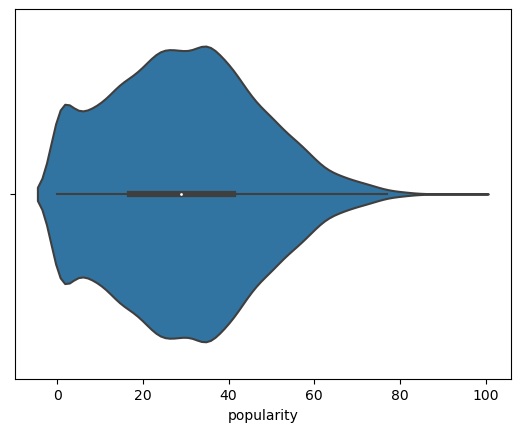

In [44]:
sbn.violinplot(tracks_data_frame, x="popularity")

### Analiza duration_ms

In [42]:
# show average song duration - convert to seconds first
tracks_data_frame["duration_ms"].apply(lambda x: x/1000).describe()

count    21608.000000
mean       228.064800
std        112.112759
min          4.000000
25%        176.735250
50%        216.514500
75%        262.653000
max       4120.258000
Name: duration_ms, dtype: float64

Rozkład długości utworów (w sekundach) w zbiorze danych:

<Axes: >

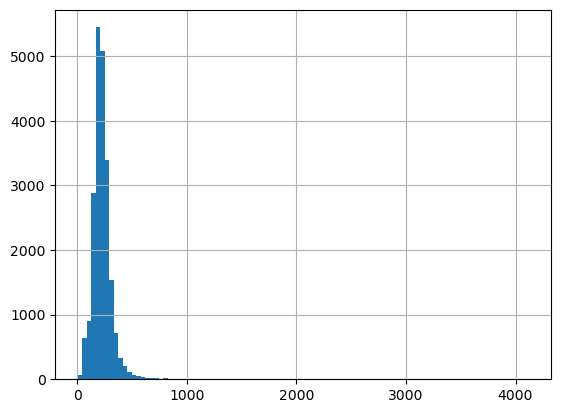

In [52]:
tracks_data_frame["duration_ms"].apply(lambda x: x/1000).hist(bins=100)

### Analiza explicit

In [59]:
print(f'% of explicit songs: {round(tracks_data_frame["explicit"].where(tracks_data_frame["explicit"] == True).count() / tracks_data_frame["explicit"].count() * 100, 2)}')
tracks_data_frame["explicit"].value_counts()

% of explicit songs: 3.69


explicit
0    20810
1      798
Name: count, dtype: int64

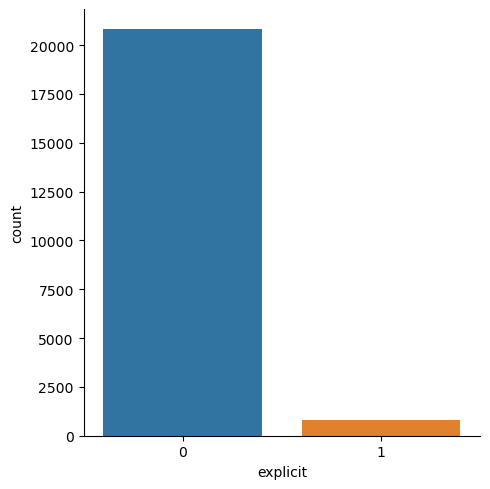

In [54]:
sbn.catplot(x="explicit", kind="count", data=tracks_data_frame)

### Analiza id_artist
Rozkład ilości utworów per artysta jest dosyć zachwiany - z jakiegoś powodu jeden artysta ma prawie 200 utworów w naszym zbiorze danych, potem kilka powyżej 50, a następnie liczba ta szybko maleje. Może to utrudniać uczenie modelu, gdyż jeśli ci popularni artyści mają np. szeroką gamę przypisanych im gatunków, to wprowadzą dużą ilość "szumu" do danych, w których próbujemy znaleźć powiązania. Gdybyśmy mieli dane o gatunkach konkretnych utworów, tego problemu by nie było.

In [63]:
tracks_data_frame["id_artist"].value_counts()

id_artist
3meJIgRw7YleJrmbpbJK6S    199
0i38tQX5j4gZ0KS3eCMoIl     94
61JrslREXq98hurYL2hYoc     73
1l6d0RIxTL3JytlLGvWzYe     67
3t2iKODSDyzoDJw7AsD99u     62
2maQMqxNnlRrBrS1oAsrX9     48
2x8vG4f0HYXzMEo3xNsoiI     48
5V0MlUE1Bft0mbLlND7FJz     46
0PCtW4w0RN89andUBQ3TVv     37
0gXDpqwYNDODn7fB0RDN8J     35
1dfeR4HaWDbWqFHLkxsg1d     33
43ZHCT0cAZBISjO8DG9PnE     33
1hD52edfn6aNsK3fb5c2OT     32
22bE4uQ6baNwSHPVcDxLCe     32
1Mxqyy3pSjf8kZZL4QVxS0     31
1YzCsTRb22dQkh9lghPIrp     30
5as8A4G47Ohu9NSWs3Je8U     30
0k17h0D3J5VfsdmQ1iZtE9     30
6AmG7SNdlV9boPZ7dFVnLY     29
0GF4shudTAFv8ak9eWdd4Y     26
19eLuQmk9aCobbVDHc6eek     25
08GQAI4eElDnROBrJRGE0X     24
602DnpaSXJB4b9DZrvxbDc     24
4etuCZVdP8yiNPn4xf0ie5     24
6kACVPfCOnqzgfEF5ryl0x     23
7fAKtXSdNInWAIf0jVUz65     22
1lhceMHrxr0jC943AuAhhh     22
0MtTfq27LQu7CmE5t308Up     22
5LiOoJbxVSAMkBS2fUm3X2     22
2QsynagSdAqZj3U9HgDzjD     22
7nzSoJISlVJsn7O0yTeMOB     22
3oDbviiivRWhXwIE8hxkVV     21
2ye2Wgw4gimLv2eAKyk1NB     21


<Axes: >

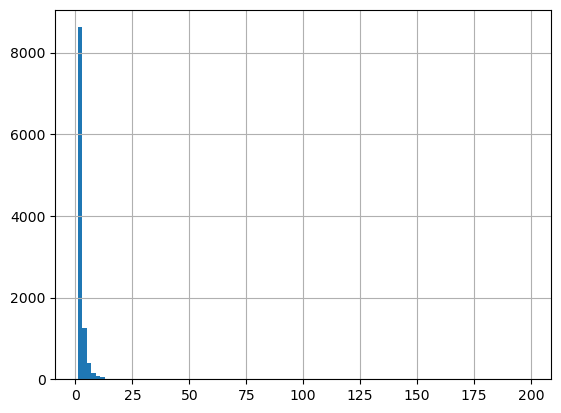

In [69]:
tracks_data_frame["id_artist"].value_counts().hist(bins=100)

### Analiza release_date
Dane o wydaniu utworów są dosyć niespójne - w przypadku starszych utworów mamy tylko rok wydania, często pojawia się też 1 stycznia danego roku. Dla nowszych utworów mamy dokładniejsze daty.

In [77]:
tracks_data_frame["release_date"].value_counts()

release_date
1996          141
1997          131
1995          124
1998          119
1998-01-01    118
1985          115
1981          114
1994-01-01    114
1980          113
1977          113
1997-01-01    112
1996-01-01    111
1995-01-01    109
1999-01-01    108
1990-01-01    107
1983          107
1987          106
1999          105
1990          101
1980-01-01     98
1994           98
1985-01-01     98
1992-01-01     97
2006-01-01     96
1991           95
1989           95
1986-01-01     95
1984           95
1991-01-01     93
1988-01-01     92
2009-01-01     91
1978           91
1992           90
1988           88
1986           86
1976           86
1975           84
1974           84
1989-01-01     82
1982           79
2005-01-01     78
1987-01-01     78
2008-01-01     78
1971           77
1981-01-01     76
1979           75
2012-01-01     75
1962           74
2007-01-01     74
1977-01-01     74
2013-01-01     73
2002-01-01     73
2003-01-01     72
2004           72
1993           

Rozkład utworów ze względu na rok wydania:

<Axes: >

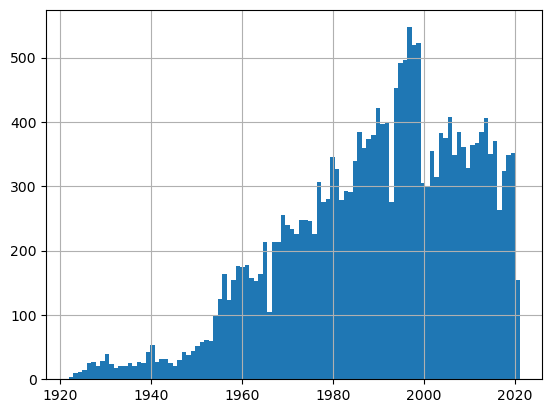

In [79]:
tracks_data_frame["release_date"].apply(lambda x: x.split("-")[0]).astype(int).hist(bins=100)

### Analiza danceability
TODO

### Analiza energy
TODO

### Analiza key
Klucze zmapowane są z użyciem notacji w postaci 0 = C, 1 = C♯/D♭, 2 = D itd.

In [80]:
tracks_data_frame["key"].value_counts()

key
0     2909
7     2751
2     2463
9     2444
5     1928
4     1828
1     1418
11    1385
10    1356
8     1255
6     1089
3      782
Name: count, dtype: int64

<Axes: >

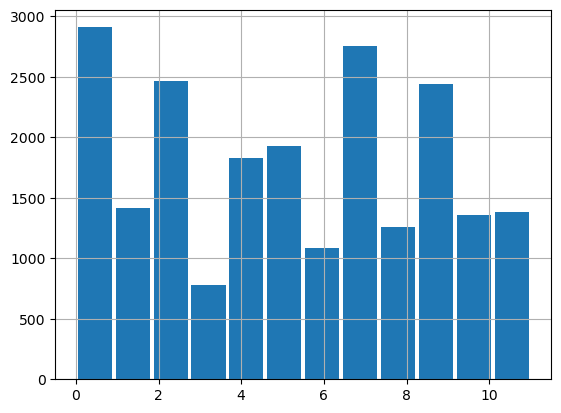

In [86]:
tracks_data_frame["key"].hist(bins=12, rwidth=0.9)

### Analiza loudness
Głośność w skali decybeli (dB). Typowy zakres to -60dB do 0 dB.

In [87]:
tracks_data_frame["loudness"].describe()

count    21608.000000
mean        -9.767099
std          4.531037
min        -60.000000
25%        -12.367000
50%         -9.038000
75%         -6.402750
max          2.487000
Name: loudness, dtype: float64

<Axes: xlabel='loudness'>

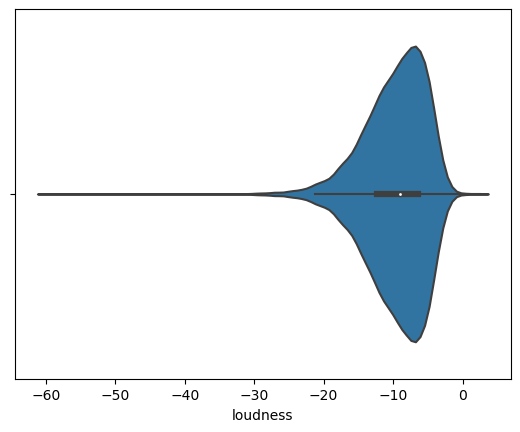

In [88]:
sbn.violinplot(tracks_data_frame, x="loudness")

### Analiza speechiness
Określa poziom ilości wykrytej mowy w utworze. Im bliżej do 1.0, tym więcej mowy. W naszym zbiorze widzimy głównie utwory muzyczne, ale bliżej `1.0` widać zbiór np. podcastów.

<Axes: xlabel='speechiness'>

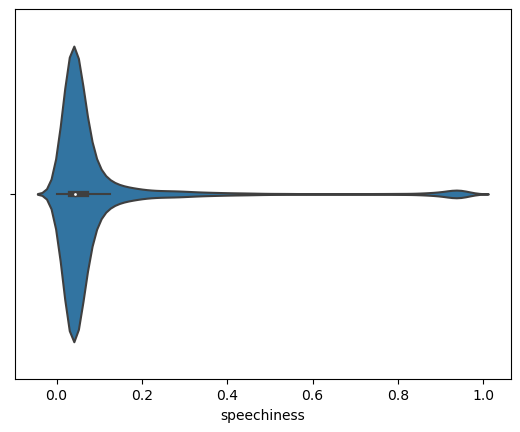

In [90]:
sbn.violinplot(tracks_data_frame, x="speechiness")

### Analiza acousticness
Stopień akustyczności utworu (im wyższy - tym więcej instrumentów akustycznych, a mniej np. elektronicznie wygenerowanych dźwięków).

<Axes: xlabel='acousticness'>

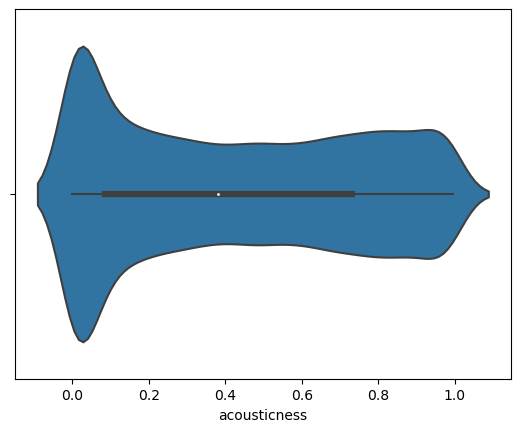

In [91]:
sbn.violinplot(tracks_data_frame, x="acousticness")

### Analiza instrumentalness
Określa stopień pewności, że utwór nie zawiera wokalu - im bliżej 1.0, tym większa pewność.

<Axes: xlabel='instrumentalness'>

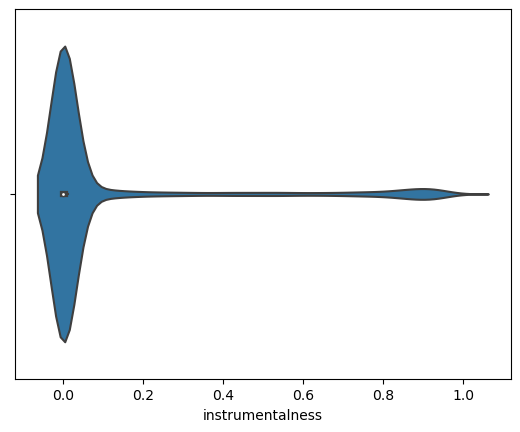

In [92]:
sbn.violinplot(tracks_data_frame, x="instrumentalness")

### Analiza liveness
Stopień pewności, że utwór był wykonywany na żywo (zawiera odgłosy np. publiczności).

<Axes: xlabel='liveness'>

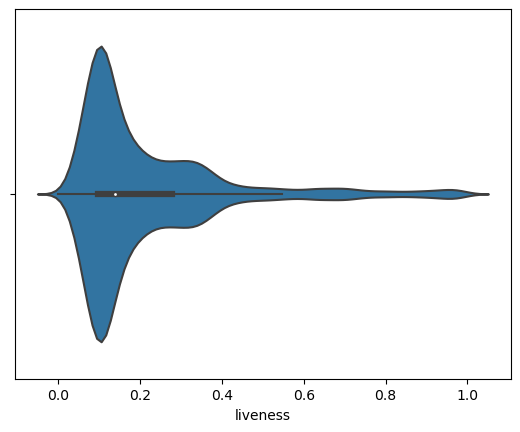

In [93]:
sbn.violinplot(tracks_data_frame, x="liveness")

### Analiza valence
Określa poziom "pozytywności" utworu - im bliżej 1.0, tym weselej brzmi dane nagranie.

<Axes: xlabel='valence'>

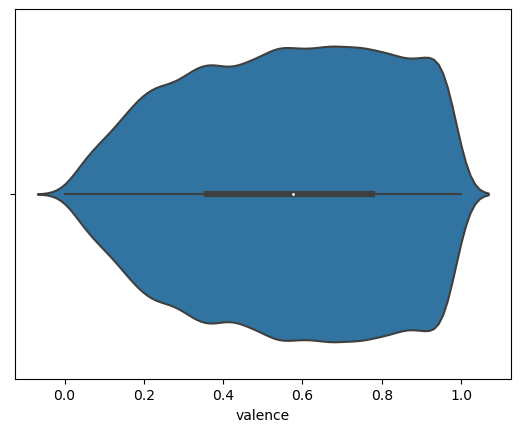

In [94]:
sbn.violinplot(tracks_data_frame, x="valence")

### Analiza tempo
Określa ilość uderzeń na minutę w utworze (BPM). Im więcej, tym szybsza (i zazwyczaj bardziej energiczna) jest dana piosenka.

<Axes: xlabel='tempo'>

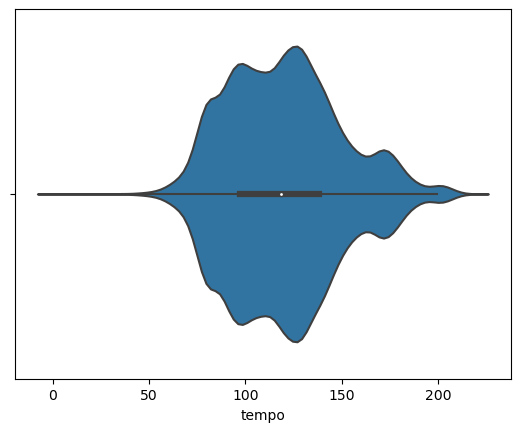

In [95]:
sbn.violinplot(tracks_data_frame, x="tempo")

# Analiza użytkowników

In [17]:
users_data_frame.head(n=5)

,user_id,name,city,street,favourite_genres,premium_user
0,101,Klara Herdzik,Szczecin,pl. Floriana 55/22,"[permanent wave, mandopop, funk]",False
1,102,Szymon Plebanek,Kraków,al. Kalinowa 27/40,"[classic rock, ranchera, lounge]",True
2,103,Szymon Zawal,Gdynia,al. Głogowa 14/10,"[filmi, regional mexican, folk]",False
3,104,Andrzej Berendt,Kraków,ul. Strażacka 14/63,"[tropical, new wave, latin]",True
4,105,Ida Karsznia,Kraków,al. Złota 549,"[soul, tropical, alternative metal]",False


Atrybuty:
* user_id - identyfikator użytkownika
* name - imię i nazwisko użytkownika
* city - miasto zamieszkania użytkownika
* street - ulica zamieszkania użytkownika
* favourite_genres - ulubione gatunki użytkownika
* premium_user - czy użytkownik posiada konto premium

In [18]:
users_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           50 non-null     int64 
 1   name              50 non-null     object
 2   city              50 non-null     object
 3   street            50 non-null     object
 4   favourite_genres  50 non-null     object
 5   premium_user      50 non-null     bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 2.1+ KB


### Analiza user_id

In [4]:
print("unique ids: {}/{}".format(users_data_frame['user_id'].nunique(), users_data_frame['user_id'].count()))
print("max_id: {}".format(users_data_frame['user_id'].max()))
print("min_id: {}".format(users_data_frame['user_id'].min()))

unique ids: 50/50
max_id: 150
min_id: 101


ID są liczbami z przedziału 101 i 150. Nie ma duplikatów.

### Analiza name

In [5]:
print("unique names: {}/{}".format(users_data_frame['name'].nunique(), users_data_frame['name'].count()))

unique names: 50/50


Wszyscy użytkownicy mają unikalne imię i nazwisko.

### Analiza city


unique cities: 7/50


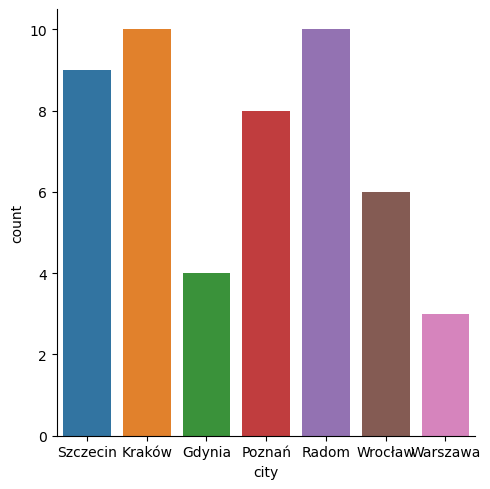

In [7]:
print("unique cities: {}/{}".format(users_data_frame['city'].nunique(), users_data_frame['city'].count()))
sbn.catplot(x="city", kind="count", data=users_data_frame)

Gdynia i Warszawa są niedoreprezentowane. Występuje 7 miast.

### Analiza street

In [8]:
print("unique street: {}/{}".format(users_data_frame['street'].nunique(), users_data_frame['street'].count()))

unique street: 50/50


Wszystkie ulice są unikatowe

### Analiza favourite_genres

In [10]:
# how many users have each favourite genre
users_data_frame['favourite_genres'].explode().value_counts()

favourite_genres
filmi                 8
hoerspiel             8
ranchera              7
psychedelic rock      6
soul                  6
alternative metal     5
funk                  5
regional mexican      5
folk                  5
turkish pop           4
c-pop                 4
europop               4
country rock          4
new wave              4
mellow gold           4
latin rock            4
classic rock          4
latin pop             4
pop rock              3
adult standards       3
rock en espanol       3
permanent wave        3
brill building pop    3
tropical              3
alternative rock      3
latin alternative     3
latin                 3
lounge                3
blues rock            2
soft rock             2
art rock              2
mandopop              2
hard rock             2
new wave pop          2
album rock            2
quiet storm           2
pop                   2
j-pop                 2
metal                 2
motown                1
vocal jazz            1

### Analiza premium_user


In [11]:
users_data_frame["premium_user"].value_counts()

premium_user
True     28
False    22
Name: count, dtype: int64

Istnieje 28 użytkowników premium.